**Data is full of potential biases**. These biases have many possible causes. There are biases caused during collecting, sampling, or labeling. Historical data might be embedded with human biases,and ML models, trained on this data, can perpetuate them. Use data but don’t trust it too much!

### 1. Sampling

Sampling happens in many steps of an ML project lifecycle, such as:
- Sampling from all possible real-world data to create training data.
- Sampling from a given dataset to create splits for training, validation, and testing.
- Sampling from all possible events that happen within your ML system for monitoring purposes.

In many cases, sampling is necessary:
1. When you don’t have access to all possible data in the real world, the **data that you use to train your model is a subset of real-world data**, created by one sampling method or another.
2. When it’s **infeasible to process all the data that you have access to**— because it requires too much time or resources—so you have to sample that data to create a subset that is feasible to process. 
3. In many other cases, sampling is helpful as it **allows you to accomplish a task faster and cheaper**. For example, when considering a new model, you might want to do a quick experiment with a small subset of your data to see if the new model is promising first before training this new model on all your data.

Two families of sampling:
1. Nonprobability sampling
2. Random sampling

#### 1.1 Nonprobability Sampling

Nonprobability sampling is when the selection of data isn't based on any probability criteria.

Some criteria for nonprobability sampling:

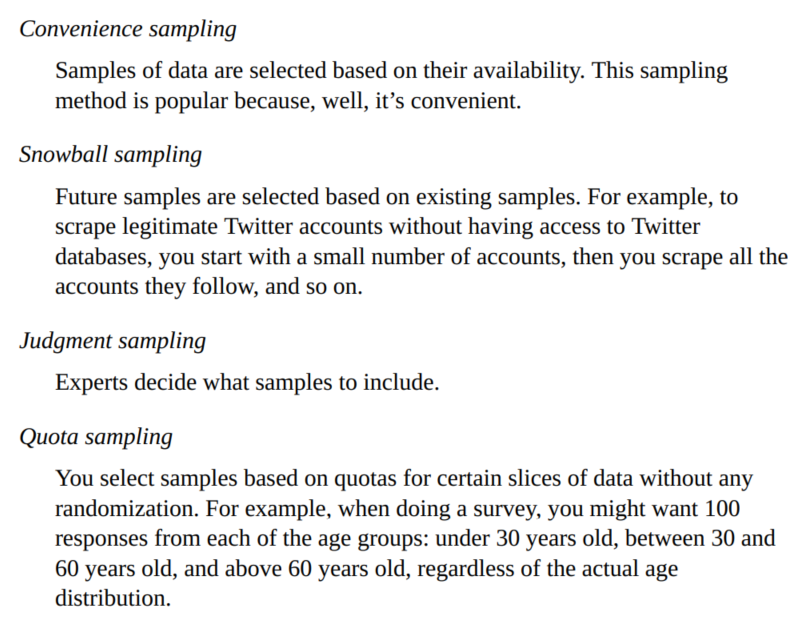

The samples selected by nonprobability criteria are not representative of the realworld data and therefore are riddled with **selection biases**. Because of these
biases, you might think that it’s a bad idea to select data to train ML models
using this family of sampling methods. You’re right. Unfortunately, in many
cases, the selection of data for ML models is still **driven by convenience**.

#### 1.2 Simple Random Sampling

Give all samples in the population **equal probabilities of being selected**.

Advantage: easy to implement.

Disadvantage: rare categories of data might not appear in your selection.

#### 1.3 Stratified Sampling

To avoid the drawback of simple random sampling, you can first **divide your population into the groups** that you care about and **sample from each group separately**. 

For example, to sample 1% of data that has two classes, A and B, you can sample 1% of class A and 1% of class B. This way, no matter how rare class A or B is, you’ll ensure that samples from it will be included in the selection.

Each group is called a **stratum**, and this method is called stratified sampling.

One drawback of this sampling method is that **it isn’t always possible**, such as when it’s **impossible to divide all samples into groups**. This is especially challenging when one sample might belong to multiple groups, as in the case of multilabel tasks. For instance, a sample can be both class A and class B.

#### 1.4 Weighted Sampling

Each sample is **given a weight**, which determines the probability of it being selected. 

A common concept in ML that is closely related to weighted sampling is **sample weights**. 

**Weighted sampling**: to select samples to train your model with.

**Sample weights**: to assign “weights” or “importance” to training samples. 

Samples with higher weights affect the loss function more. Changing sample weights can change your model’s decision boundaries significantly, as shown below.

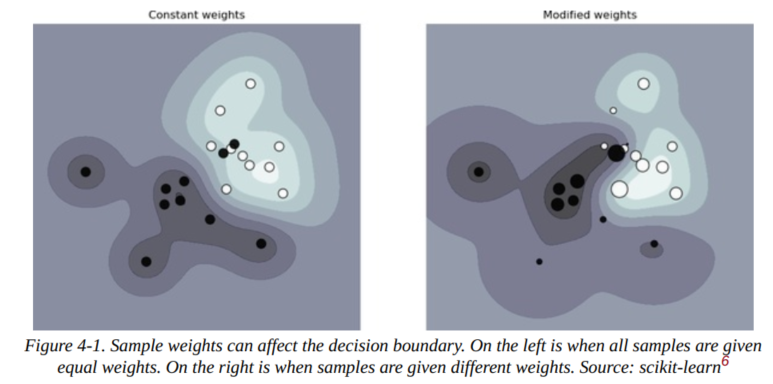

In [9]:
# Choose two items from the list such that 1, 2, 3, 4 each has
# 20% chance of being selected, while 100 and 1000 each have only 10% chance.
import random
random.choices(population=[1, 2, 3, 4, 100, 1000],
weights=[0.2, 0.2, 0.2, 0.2, 0.1, 0.1], k=2)
# This is equivalent to the following
random.choices(population=[1, 1, 2, 2, 3, 3, 4, 4, 100, 1000],  k=2)

[3, 4]

#### 1.5 Reservoir Sampling

Useful when you have to deal with streaming data, which is usually what you have in production.

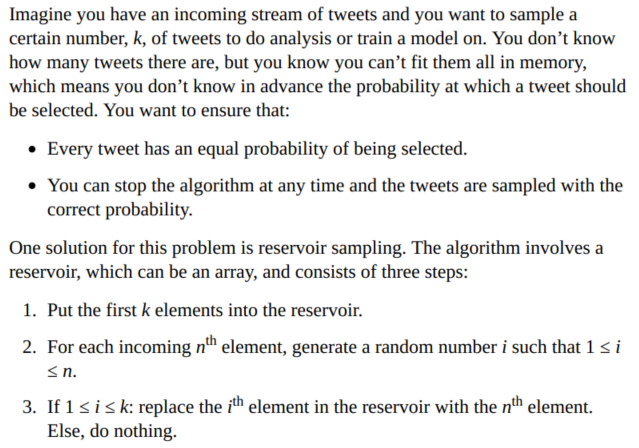

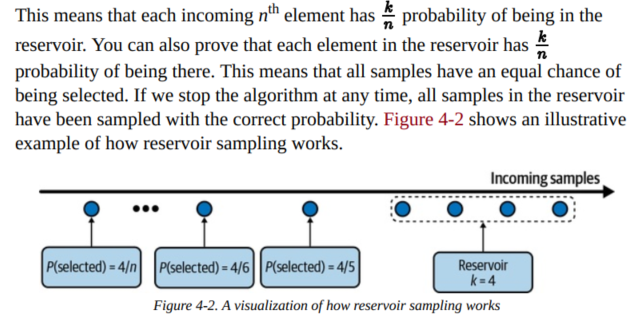

#### 1.6 Importance Sampling

It allows us to sample from a distribution when we only have access to another distribution.

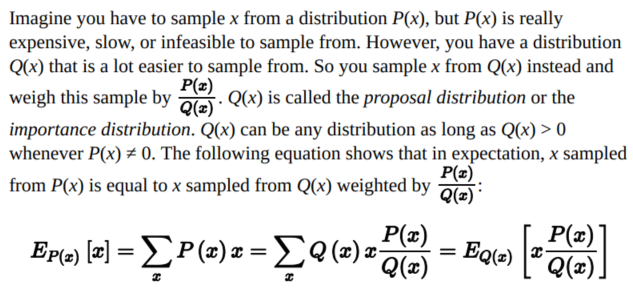

### 2. Labeling

#### 2.1 Hand Labels

Acquiring hand labels for your data is difficult:
1. Hand-labeling data can be **expensive**, especially if subject matter expertise is required.
2. Poses a threat to **data privacy**.
3. Hand-labeling is **slow**.

##### Label multiplicity

Often, to obtain enough labeled data, companies have to use data from multiple sources and rely on multiple annotators who have different levels of expertise. These different data sources and annotators also have different levels of accuracy. This leads to the problem of **label ambiguity or label multiplicity**.

The higher the level of domain expertise required, the higher the potential for annotating disagreement.

To minimize the disagreement among annotators, it’s important to first have a clear problem definition. 

##### Data lineage

Indiscriminately using data from multiple sources, generated with different annotators, without examining their quality can cause your model to fail mysteriously. 

It’s good practice to **keep track of the origin of each of your data samples as well as its labels**, a technique known as **data lineage**. Data lineage helps you both flag potential biases in your data and debug your models.

For example, if your model fails mostly on the recently acquired data samples, you might want to look into how the new data was acquired. On more than one occasion, we’ve discovered that the problem wasn’t with our model, but because of the unusually high number of wrong labels in the data that we’d acquired recently.

#### 2.2 Natural Labels

Tasks with natural labels are tasks where the **model’s predictions can be automatically evaluated or partially evaluated by the system**. 

An example is the model that estimates time of arrival
for a certain route on Google Maps. If you take that route, by the end of your
trip, Google Maps knows how long the trip actually took, and thus can evaluate
the accuracy of the predicted time of arrival. Another example is stock price
prediction. If your model predicts a stock’s price in the next two minutes, then
after two minutes, you can compare the predicted price with the actual price.

The canonical example of tasks with natural labels is recommender systems. The
goal of a recommender system is to recommend to users items relevant to them.
Whether a user clicks on the recommended item or not can be seen as the
feedback for that recommendation. A recommendation that gets clicked on can
be presumed to be good (i.e., the label is POSITIVE) and a recommendation that
doesn’t get clicked on after a period of time, say 10 minutes, can be presumed tobe bad (i.e., the label is NEGATIVE).

Companies find it easier and cheaper to first start on tasks that have natural labels.

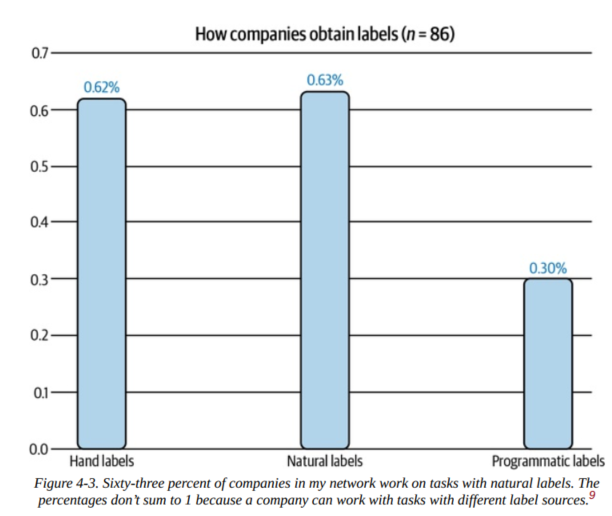

In the previous example, a recommendation that doesn’t get clicked on after a
period of time can be presumed to be bad. This is called an **implicit label**, as this
negative label is presumed from the lack of a positive label. 

It’s different from
**explicit labels** where users explicitly demonstrate their feedback on a
recommendation by giving it a low rating or downvoting it.

##### Feedback loop length

**Feedback loop length**: For tasks with natural ground truth labels, the time it takes from when a prediction is served until when the feedback on it is provided.

Tasks with short feedback loops are tasks where labels are generally available within minutes. Many recommender systems have short feedback loops.

Labels with long feedback loops are helpful for reporting a model’s performance on quarterly or yearly business reports. However, they are not very helpful if you want to detect issues with your models as soon as possible. 

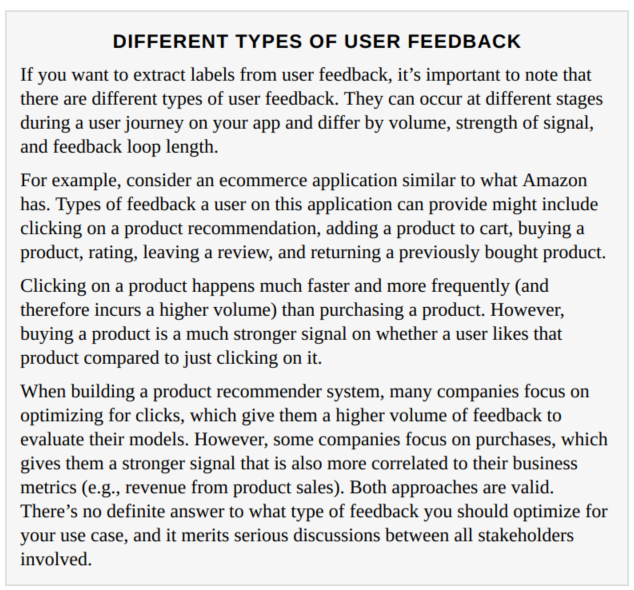

#### 2.3 Handling the Lack of Labels

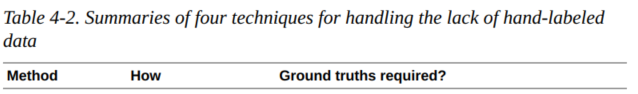

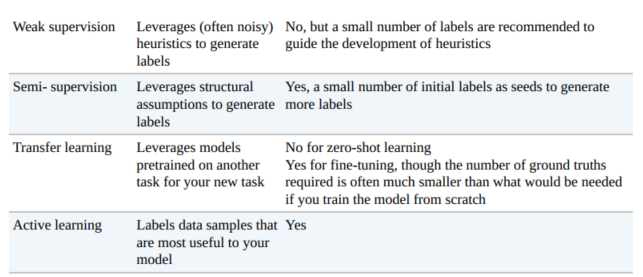

##### Weak supervision

- One of the most popular open source tools for weak supervision is **Snorkel**, developed at the Stanford AI Lab.
- The insight behind weak supervision is that people rely on **heuristics**, which can be developed with subject matter expertise, to label data.

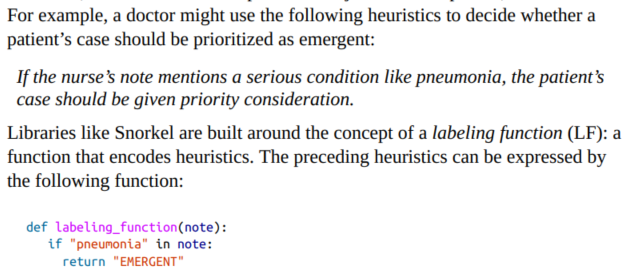
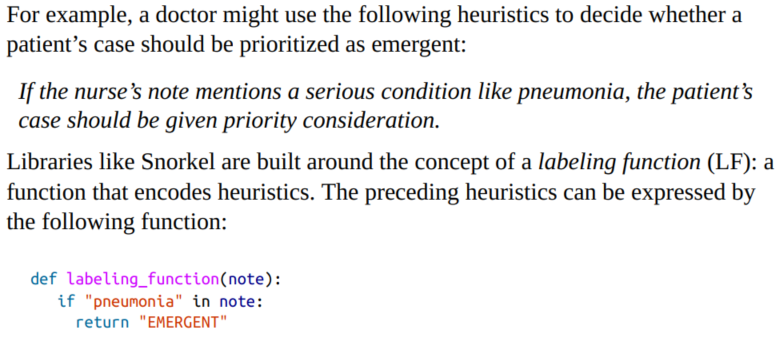

**Labeling function (LF)** can encode many different types of heuristics:
1. **Keyword heuristics:** Such as the preceding example.
2. **Regular expressions:** Such as if the note matches or fails to match a certain regular expression.
3. **Database lookup:** Such as if the note contains the disease listed in the dangerous disease list.
4. **The outputs of other models:** Such as if an existing system classifies this as EMERGENT.

Because LFs encode heuristics, and **heuristics are noisy, labels produced by LFs are noisy**. Multiple LFs might apply to the same data examples, and they might give **conflicting labels**. 

It’s important to **combine, denoise, and reweight all LFs** to get a set of most likely to be correct labels.

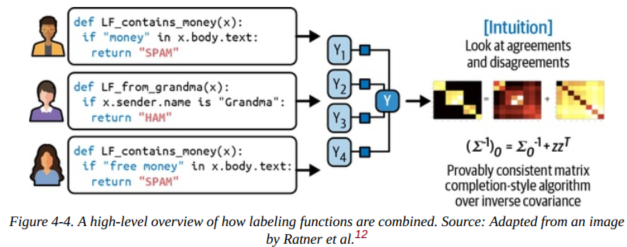

In theory, you don’t need any hand labels for weak supervision. However, to get a sense of how accurate your LFs are, **a small number of hand labels is recommended**. These hand labels can help you discover patterns in your data to write better LFs.

Weak supervision can be especially **useful when your data has strict privacy** requirements. You only need to see a small, cleared subset of data to write LFs, which can be applied to the rest of your data without anyone looking at it.

With LFs, **subject matter expertise can be versioned, reused, and shared**. Expertise owned by one team can be encoded and used by another team. If your data changes or your requirements change, you can just **reapply LFs to your data samples**. 

The approach of using LFs to generate labels for your data is also known as **programmatic labeling**.

The advantages of programmatic labeling over hand labeling:

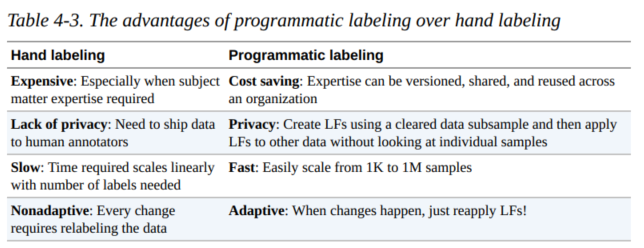

If heuristics work so well to label data, why do we need ML models? One reason is that **LFs might not cover all data samples**, so we can train ML models on data programmatically labeled with LFs and use this trained model to generate predictions for samples that aren’t covered by any LF.

In some cases, **the labels obtained by weak supervision might be too noisy to be useful**. But even in these cases, weak supervision can be a good way to get you started when you want to explore the effectiveness of ML without wanting to invest too much in hand labeling up front.

##### Semi-supervision

Semi-supervision leverages **structural assumptions** to generate new labels based on a small set of **initial labels**.

Method 1: **Self-training**:
- Start by **training a model on your existing set of labeled data** and use this model to make **predictions for unlabeled samples**.
- Assuming that **predictions with high raw probability scores are correct**, you **add the labels predicted with high probability to your training set** and **train a new model on this expanded training set**.
- This goes on until you're happy with your model performance. 

Method 2: assumes that **data samples that share similar characteristics share the same labels**
- e.g. The similarity might be obvious, such as in the task of classifying the topic of Twitter hashtags. You can start by labeling the
hashtag “#AI” as Computer Science. Assuming that hashtags that appear in the same tweet or profile are likely about the same topic, given the profile of MIT CSAIL, you can also label the hashtags “#ML” and “#BigData” as Computer Science.
- In most cases, the **similarity can only be discovered by more complex methods**. For example, you might need to use a **clustering method** or a k-nearest neighbors algorithm to discover samples that belong to the same cluster.

Method 3: **Perturbation-based**:
- It’s based on the assumption that **small perturbations to a sample shouldn’t change its label**. 
- So you apply **small perturbations to your training instances** to obtain **new training instances**. 
- The perturbations might be applied directly to the samples (e.g., adding white noise to images) or to their representations (e.g., adding small random values to embeddings of words). 
- The perturbed samples have the same labels as the unperturbed samples. 

One thing to consider when doing semi-supervision with limited data is **how much of this limited data should be used to evaluate multiple candidate models and select the best one**. 

If you use a **small amount**, the best performing model on this small evaluation set might be the one that overfits the most to this set. 

If you use a **large amount** of data for evaluation, the performance boost gained by selecting the best model based on this evaluation set might be less than the boost gained by adding the evaluation set to the limited training set. 

Many companies overcome this **trade-off** by using a **reasonably large evaluation set to select the best model**, then **continuing training the champion model on the evaluation set**.

##### Transfer learning

Family of methods where a model developed for a task is reused as the starting point for a model on a second task.

First, the **base model is trained for a base task**. The base task is usually a task that has cheap and abundant training data.
- e.g. Language modeling is a great candidate because it doesn’t require labeled data. Language models can be trained on any body of text—books, Wikipedia articles, chat histories—and the task is: given a sequence of tokens, predict the next token. 

The trained model can then be used for the task that you’re interested in—a **downstream task**.
- e.g. sentiment analysis, intent detection, or question answering.
- In some cases, such as in **zero-shot learning** scenarios, you might be able to use the base model on a downstream task **directly**.
-  In many cases, you might need to **fine-tune** the base model.

Sometimes, you might need to modify the inputs using a template to prompt the base model to generate the outputs you want.

For example, to use a language model as the base model for a question answering task, you might want to use this prompt:

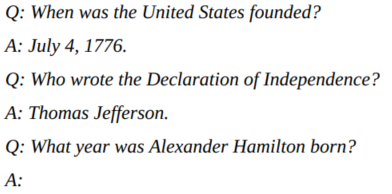

When you input this prompt into a language model such as GPT-3, it might output the year Alexander Hamilton was born.

Transfer learning is especially appealing for **tasks that don’t have a lot of labeled data**. 

Even for tasks that have a lot of labeled data, using a pretrained model as the starting point can often **boost the performance** significantly compared to training from scratch.

A trend that has emerged in the last five years is that (usually) **the larger the pretrained base model, the better its performance on downstream tasks**.

##### Active learning

Active learning is a method for improving the **efficiency of data labels**. The hope here is that ML models can **achieve greater accuracy with fewer training labels if they can choose which data samples to learn from**.

Active learning is sometimes called **query learning**—though this term is getting increasingly unpopular—because a **model (active learner)** sends back queries in the form of unlabeled samples to be labeled by **annotators (usually humans)**.

Instead of randomly labeling data samples, you **label the samples** that are **most helpful** to your models according to some **metrics or heuristics**.

1. Metric: uncertainty measurement
    - **Label the examples that your model is the least certain about**, hoping that they will help your model learn the decision boundary better.
    - e.g. in the case of classification problems where your model outputs raw probabilities for different classes, it might choose the data samples with the lowest probabilities for the predicted class. 

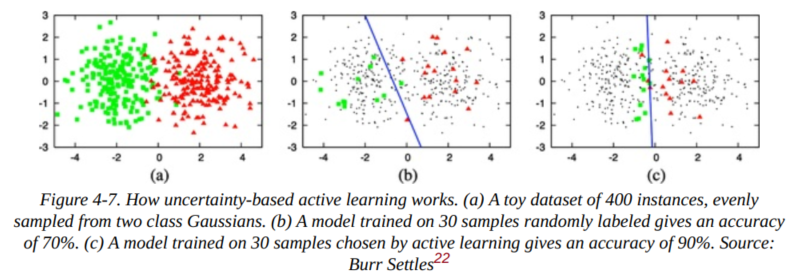

2. Heuristic: disagreement among multiple candidate models
    - **Query-by-committee**, an example of ensemble learning.
    - You need a committee of **several candidate models**, which are usually the **same model trained with different sets of hyperparameters** or the **same model trained on different slices of data**.
    -  Each model can make one vote for which samples to label next, and it might vote based on how uncertain it is about the prediction. 
    - You then label the samples that the committee disagrees on the most.

There are other heuristics such as choosing samples that, if trained on them, will give the highest gradient updates or will reduce the loss the most.

The samples to be labeled can come from different data regimes: 
- They can be synthesized where your model **generates samples in the region of the input space that it’s most uncertain about**.
- They can come from a **stationary distribution** where you’ve already collected a lot of unlabeled data and your model chooses samples from this pool to label. 
- They can come from the **real-world distribution** where you have a **stream of data coming in**, as in production, and your model chooses samples from this stream of data to label.

### 3. Class Imbalance

**Classification**:
- There is a substantial difference in the number of samples in each class of the training data.
- e.g. in a training dataset for the task of detecting lung cancer from X-ray images, 99.99% of the X-rays might be of normal lungs, and only 0.01% might contain cancerous cells.

**Regression**:
- Consider the task of estimating health-care bills. Health-care bills are highly skewed—the median bill is low, but the 95th percentile bill is astronomical. 
- When predicting hospital bills, it might be more important to predict accurately the bills at the 95th percentile than the median bills. 
- A 100% difference in a $250 bill is acceptable (actual $500, predicted $250), but a 100% difference on a $10k bill is not (actual $20k, predicted $10k). 
- Therefore, we might have to train the model to be better at predicting 95th percentile bills, even if it reduces the overall metrics.

#### 3.1 Challenges of Class Imbalance

Class imbalance can make learning difficult for the following reasons:
1. There’s insufficient signal for your model to learn to detect the minority classes. 
    - In the case where there is a small number of instances in the minority class, the problem becomes a **few-shot** learning problem where your model only gets to see the minority class a few times before having to make a decision on it.
    - In the case where there is no instance of the rare classes in your training set, your model **might assume these rare classes don’t exist**.
2. Makes it easier for your model to get stuck in a nonoptimal solution by exploiting a simple heuristic instead of learning anything useful about the underlying pattern of the data.
    - Consider the preceding lung cancer detection example. If your model learns to always output the majority class, its accuracy is already 99.99%.
    - This heuristic can be very **hard for gradient descent algorithms to beat** because a **small amount of randomness added to this heuristic might lead to worse accuracy**.
3. Class imbalance leads to asymmetric costs of error.
    - The **cost** of a **wrong prediction** on a sample of the **rare class** might be much **higher** than a wrong prediction on a sample of the majority class.
    - e.g. misclassification on an X-ray with cancerous cells is much more dangerous than misclassification on an X-ray of a normal lung. If your loss function isn’t configured to address this asymmetry, your model will treat all samples the same way.
    - As a result, you might obtain a model that performs equally well on both majority and minority classes, while you much prefer a model that performs less well on the majority class but much better on the minority one.

The reason of class imbalance:
1. Inherent in the problem
    - e.g. Fraud detection (most credit card transactions are not fraudulent), disease screening (most people don't have terminal illness).
2. Biases during the sampling process
    - e.g. Consider the case when you want to create training data to detect whether an email is spam or not. You decide to use all the anonymized emails from your company’s email database. 
    - According to Talos Intelligence, as of May 2021, nearly 85% of all emails are spam. But most spam emails were filtered out before they reached your company’s database, so in your dataset, only a small percentage is spam.
3. Labeling errors

#### 3.2 Handling Class Imbalance

**Sensitivity to imbalance increases with the complexity of the problem**, and that noncomplex, linearly separable problems are unaffected by all levels of class imbalance.

Class imbalance in binary classification problems is a much easier problem than class imbalance in multiclass classification problems.

Very deep neural networks—with “very deep” meaning over 10 layers back in 2017—performed much better on imbalanced data than shallower neural networks.

Three approaches to handling class imbalance:
1. Choosing the right metrics for your problem
2. Data-level methods
    - Which means changing the data distribution to make it less imbalanced.
3. Algorithm-level methods
    - Which means changing your learning method to make it more robust to class imbalance.

##### Using the right evaluation metrics

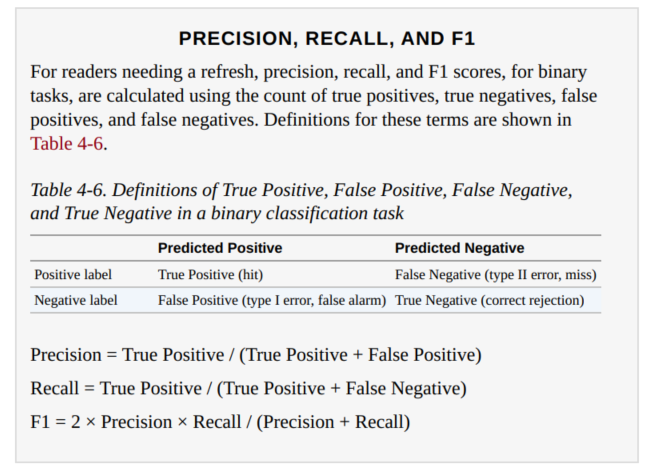

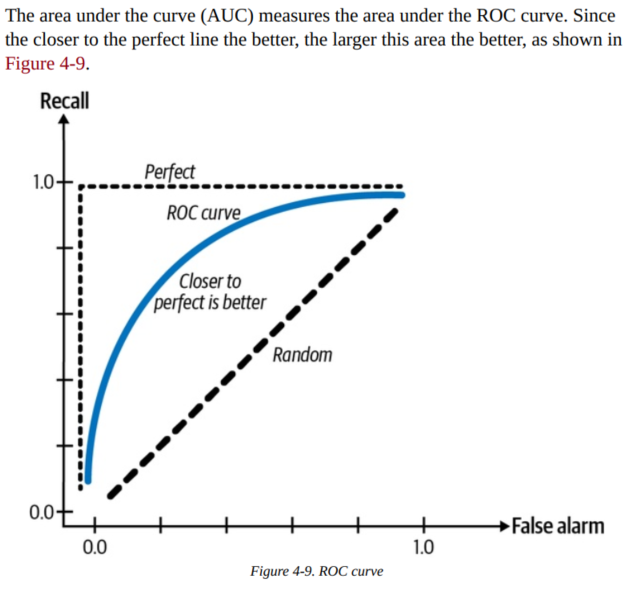

Like F1 and recall, the ROC curve **focuses only on the positive class and doesn’t show how well your model does on the negative class**. 

Davis and Goadrich suggested that we should plot precision against recall instead, in what they termed the **Precision-Recall Curve**. They argued that **this curve gives a more informative picture of an algorithm’s performance on tasks with heavy class imbalance**.

##### Data-level methods: Resampling

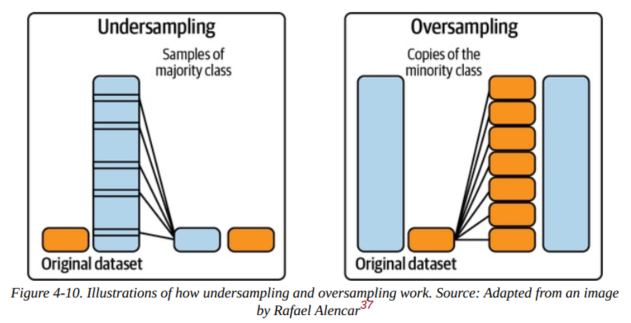

Data-level methods modify the distribution of the training data to reduce the level of imbalance to make it easier for the model to learn. 

**Undersampling**:
- Removing instances of the majority classes.
- The simplest way to undersample is to **randomly remove instances from the majority class**.
- Low-dimensional data: **Tomek links**
  - Find pairs of samples from **opposite classes** that are **close in proximity** and **remove the sample of the majority class** in each pair.
  - This makes the **decision boundary more clear** and arguably helps models learn the boundary better.
  - It may make the model **less robust** because the model **doesn’t get to learn** from the **subtleties** of the **true decision boundary**.
- Runs the risk of **losing important data** from removing data.

**Oversampling**:
- Adding more instances from the minority classes.
- The simplest way to oversample is to **randomly make copies of the minority class until you have a ratio that you’re happy with**. 
- Low-dimensional data: **SMOTE (synthetic minority oversampling technique)**
  - It synthesizes novel samples of the minority class through sampling convex combinations of existing data points within the minority class.
- Runs the risk of **overfitting on training data**, especially if the added copies of the minority class are replicas of existing data.

Many of the sophisticated resampling techniques, such as **Near-Miss** and **one-sided selection**, require calculating the distance between instances or between instances and the decision boundaries, which can be **expensive or infeasible** for **high-dimensional data or in high-dimensional feature space**, such as the case with large neural networks.

When you resample your training data, **never evaluate your model on resampled data**, since it will cause your model to overfit to that resampled distribution.

Many sophisticated sampling techniques have been developed to mitigate the risk of undersampling and oversampling:
1. Two-phase learning
    - First **train** your model on the **resampled data**. 
    - This resampled data can be achieved by **randomly undersampling large classes until each class has only N instances**. 
    - Then **finetune your model on the original data**.
2. Dynamic sampling
    - **Oversample the low-performing classes** and **undersample the high-performing classes** during the training process.
    - The method aims to show the model less of what it has already learned and more of what it has not.

##### Algorithm-level methods

Algorithm-level methods keep the training data distribution intact but alter the algorithm to make it more robust to class imbalance.

Let $L(x;\theta)$ be the loss caused by the instance $x$ for the model with the parameter set $\theta$. **The model's loss** is often defined as **the average loss caused by all instances**. $N$ denotes the number of training samples.
$$L(X;\theta) = \Sigma_{x} \frac{1}{N} L(x;\theta)$$

This loss function **values the loss caused by all instances equally**, even though wrong predictions on some instances might be much costlier than wrong predictions on other instances.

Ways to modify the cost function:
1. Cost-senstive learning
2. Class-balanced loss
3. Focal loss

Cost-senstive learning

Using a **cost matrix** to specify $C_{ij}$: the cost if class $i$ is classified as class $j$.

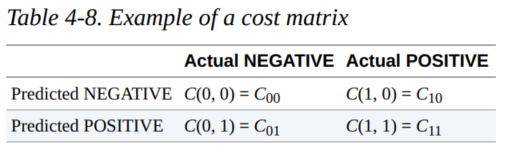

The loss caused by instance $x$ of class $i$ will become the **weighted average of all possible classifications of instance $x$**.
$$L(x;\theta) = \Sigma_{j} C_{ij} P(j|x;\theta)$$

The problem with this loss function is that you have to **manually define the cost matrix**, which is different for different tasks at different scales.

Class-balanced loss

Make the **weight of each class inversely proportional to the number of samples in that class**, so that the rarer classes have higher weights.
$$W_{i} = \frac{N}{\text{number of samples of class}~i}$$

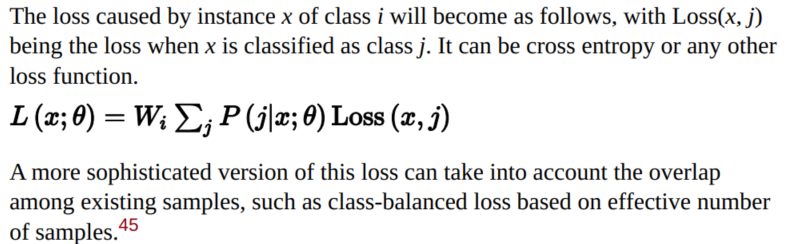

Focal loss

We want to incentivize our model to **focus on learning the samples it still has difficulty classifying**. 

What if we adjust the loss so that **if a sample has a lower probability of being right, it’ll have a higher weight**? This is exactly what focal loss does.

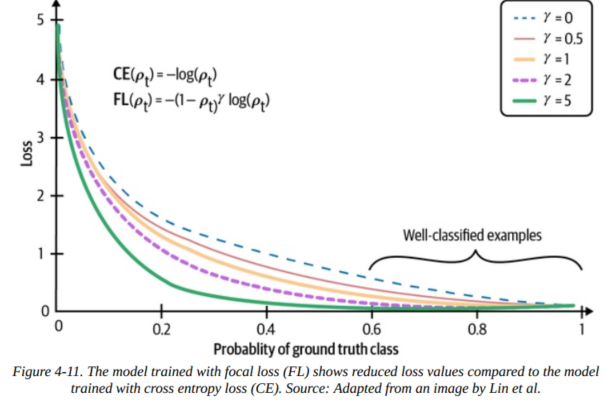

### 4. Data Augmentation

Traditionally, data augmentation are used for **tasks that have limited training data**. 

However, in the last few years, they have shown **to be useful even when we have a lot of data**—augmented data can make our models more robust to noise and even adversarial attacks.

#### 4.1 Simple Label-Preserving Transformations

1. CV
  -  Randomly modify an image while preserving its label. 
  - e.g. You can modify the image by cropping, flipping, rotating, inverting (horizontally or vertically), erasing part of the image, and more.
2. NLP
  - Randomly replace a word with a similar word, assuming that this replacement wouldn’t change the meaning or the sentiment of the sentence.
  - Similar words can be found either with a dictionary of synonymous words or by finding words whose embeddings are close to each other in a word embedding space.

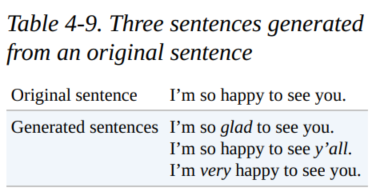

#### 4.2 Perturbation

Also a **label-preserving** operation, but but because sometimes it’s used to **trick models into making wrong predictions**, I thought it deserves its own section.

**Neural networks**, in general, are **sensitive to noise**.

**Adversarial attacks**:
- Using **deceptive data** to trick a neural network into **making wrong predictions**.
- **Adding noise** is a common technique to create **adversarial samples**.
- The success of adversarial attacks is especially **exaggerated as the resolution of images increases**.

1. CV
  - Adding a **small amount of noise** to an image can cause a neural network to **misclassify** it.
  - e.g. Su et al. showed that 67.97% of the natural images in the Kaggle CIFAR-10 test dataset and 16.04% of the ImageNet test images can be misclassified by changing just one pixel. 
  - Adding **noisy samples** to training data can help models **recognize the weak spots** in their **learned decision boundary** and improve their performance.
  - Noisy samples can be created by either adding **random noise** or by a **search strategy**.
  - e.g. **DeepFool**: finds the minimum possible possible noise injection needed to cause a misclassification with high confidence. This type of augmentation is called **adversarial augmentation**.
2. NLP
  - **Adversarial augmentation is less common in NLP**. 
  - e.g. an image of a bear with randomly added pixels still looks like a bear, but adding random characters to a random sentence will likely render it gibberish)
  - **Pertubations** has been used to make models more **robust**.
  - e.g. **BERT**: the model chooses 15% of all tokens in each sequence at random and chooses to
replace 10% of the chosen tokens with random words. For example, given the
sentence “My dog is hairy,” and the model randomly replacing “hairy” with
“apple,” the sentence becomes “My dog is apple.” So 1.5% of all tokens might
result in nonsensical meaning. Their ablation studies show that a small fraction
of random replacement gives their model a small performance boost.

#### 4.3 Data Synthesis

Using neural networks to synthesize training data is an exciting approach that is actively being researched but not yet popular in production.

1. CV
  - Combine existing examples with discrete labels to generate continuous labels.

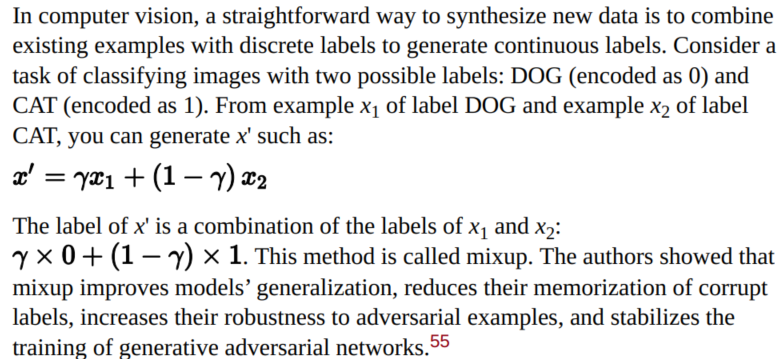

2. NLP
  - **Templates** can be a cheap way to bootstrap your model.

  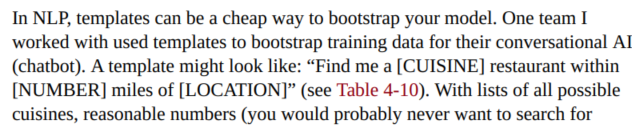

  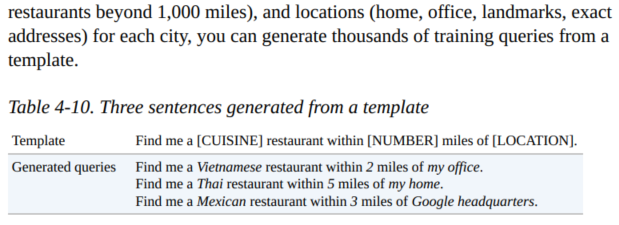